# Imports

Dependecies

In [59]:
import os
import cv2
import qrcode
import random
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [11]:
emojis = {
    "check_mark_button":    "\U00002705",
    "cross_mark":           "\U0000274C",
    "magnifying_glass":     "\U0001F50D"
}

# Transparency recovery test

The recovery function takes two transpareces and use them to obtain a qr_code object

## Image load

Generic function to load images (with transparences of distorted transparences)

In [7]:
# 1 - open the images
def load_trans_im(path_im_A="", path_im_B=""):
    """
    """
    if(path_im_A!="" and path_im_B!=""):
        try:
            im_trans_A = Image.open(path_im_A, mode="r")
            im_trans_B = Image.open(path_im_B, mode="r")
            print(emojis["check_mark_button"] + f" Transparence A successfully loaded from {path_im_A}")
            print(emojis["check_mark_button"] + f" Transparence B successfully loaded from {path_im_B}")
            return im_trans_A, im_trans_B
        except:
            print(emojis["cross_mark"] + " Unable to correctly load the image/s")
    else:
        print(emojis["cross_mark"] + f" One or more paths to the image/s were not provided")

In [ ]:
!pwd

In [ ]:
im_trans_A, im_trans_B = load_trans_im(path_im_A='/Users/eiglesias/Desktop/vcsd_test/decryptor/trans_A.png',
                                       path_im_B='/Users/eiglesias/Desktop/vcsd_test/decryptor/trans_B.png')

In [ ]:
print(type(im_trans_A))
print(type(im_trans_B))

## Transparence extraction from the loaded images

 Generic function to convert an image of a transparence in a proper numpy array

In [6]:
# 2 - transform images to numpy array format
def gen_transparence_from_image(im):
    """
    """
    trans_rgb = np.array(im)
    trans = trans_rgb.mean(axis=2).astype(int)
    trans = (trans/255).astype(int)
    return trans

In [ ]:
print(type(im_trans_A))
print(type(im_trans_B))

In [ ]:
print(im_trans_A.size)

In [ ]:
trans_A = gen_transparence_from_image(im_trans_A)
trans_B = gen_transparence_from_image(im_trans_B)

In [ ]:
print("Transparence A")
print(trans_A.shape)
print(trans_A)
print("Transparence B")
print(trans_B.shape)
print(trans_B)

# Transparences decryption test

## Functions to load and recover

In [8]:
# 1 - Call the transparence image load function
im_trans_A, im_trans_B = load_trans_im(path_im_A="/Users/eiglesias/Desktop/vcsd_test/decryptor/trans_A.png",
                                       path_im_B="/Users/eiglesias/Desktop/vcsd_test/decryptor/trans_B.png")   

# 2 - Call the transparence recover function
trans_A = gen_transparence_from_image(im_trans_A)
trans_B = gen_transparence_from_image(im_trans_B)

✅ Transparence A successfully loaded from /Users/eiglesias/Desktop/vcsd_test/decryptor/trans_A.png
✅ Transparence B successfully loaded from /Users/eiglesias/Desktop/vcsd_test/decryptor/trans_B.png


In [9]:
print("Transparence A")
print(trans_A.shape)
print(trans_A)
print("Transparence B")
print(trans_B.shape)
print(trans_B)

Transparence A
(42, 42)
[[1 1 0 ... 1 0 1]
 [1 1 1 ... 0 1 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 0]
 [1 0 0 ... 0 0 1]
 [1 1 1 ... 0 0 0]]
Transparence B
(42, 42)
[[0 0 1 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 1]
 ...
 [1 0 0 ... 1 0 0]
 [0 1 1 ... 1 0 1]
 [0 0 0 ... 1 0 0]]


## Check size and version

In [ ]:
qr_size = round(len(trans_A)/2)
print(qr_size)

Generating the python dictionary

In [ ]:
step = 4
version1 = 21
version40 = 177 + step

In [ ]:
for idx, size in enumerate(range(version1, version40, step)):
    if((idx+1)%5 != 0):
        print(f'{size}: {idx+1},  \t', end=" ")
    else:
        print(f'{size}: {idx+1},  \t', end="\n")

In [ ]:
# size: version dictionary
# keys   -> qr code sizes
# values -> qr code version number
qr_size_version_dict = {
    21:  1,  	 25:  2,  	 29:  3,  	 33:  4,  	 37:  5,  	
    41:  6,  	 45:  7,  	 49:  8,  	 53:  9,  	 57:  10,  	
    61:  11,  	 65:  12,  	 69:  13,  	 73:  14,  	 77:  15,  	
    81:  16,  	 85:  17,  	 89:  18,  	 93:  19,  	 97:  20,  	
    101: 21,  	 105: 22,  	 109: 23,  	 113: 24,  	 117: 25,  	
    121: 26,  	 125: 27,  	 129: 28,  	 133: 29,  	 137: 30,  	
    141: 31,  	 145: 32,  	 149: 33,  	 153: 34,  	 157: 35,  	
    161: 36,  	 165: 37,  	 169: 38,  	 173: 39,  	 177: 40
}

In [ ]:
emojis = {
    "check_mark_button":    "\U00002705",
    "cross_mark":           "\U0000274C",
    "magnifying_glass":     "\U0001F50D"
}

In [ ]:
print(emojis["magnifying_glass"] + f" Loaded transparences correspond to a version {qr_size_version_dict[qr_size]} QR code")

## Check size nad version Final

In [12]:
# size: version dictionary
# keys   -> qr code sizes
# values -> qr code version number
qr_size_version_dict = {
    21:  1,  	 25:  2,  	 29:  3,  	 33:  4,  	 37:  5,  	
    41:  6,  	 45:  7,  	 49:  8,  	 53:  9,  	 57:  10,  	
    61:  11,  	 65:  12,  	 69:  13,  	 73:  14,  	 77:  15,  	
    81:  16,  	 85:  17,  	 89:  18,  	 93:  19,  	 97:  20,  	
    101: 21,  	 105: 22,  	 109: 23,  	 113: 24,  	 117: 25,  	
    121: 26,  	 125: 27,  	 129: 28,  	 133: 29,  	 137: 30,  	
    141: 31,  	 145: 32,  	 149: 33,  	 153: 34,  	 157: 35,  	
    161: 36,  	 165: 37,  	 169: 38,  	 173: 39,  	 177: 40
}
# 3 - check size of transparence to know the correspondent qr code version to generate
if(len(trans_A) == len(trans_B)):
    qr_size = round(len(trans_A)/2)
    print(emojis["check_mark_button"] + " Loaded transparences are equally sized")
    detected_version = qr_size_version_dict[qr_size]
    print(emojis["magnifying_glass"] + f" Loaded transparences correspond to a QR code version {detected_version}")
else:
    print(emojis["cross_mark"] + f" There is size mismatch between both transparencies: {trans_A.shape} and {trans_B.shape}. They need to be equally sized")

✅ Loaded transparences are equally sized
🔍 Loaded transparences correspond to a QR code version 1


## Extract binary matrix

In [ ]:
# 5 - Recover QR code matrix applying visual criptography
print("Transparence A")
print(type(trans_A))
print(trans_A.shape)
print(trans_A)
print("Transparence B")
print(type(trans_B))
print(trans_B.shape)
print(trans_B)

In [ ]:
qr_rec_XOR = trans_A != trans_B

In [ ]:
print(qr_rec_XOR.shape)
print(qr_rec_XOR)

In [ ]:
submatrix_size = 2
qr_rec = qr_rec_XOR[::submatrix_size, ::submatrix_size]

In [ ]:
print(qr_rec.shape)
print(qr_rec)

In [ ]:
# just to check
print(qr_rec.astype(int))

In [ ]:
a = np.array([[1, 0, 1, 0],
              [0, 0, 0, 0],
              [1, 0, 1, 0],
              [0, 0, 0, 0]])

In [ ]:
submatrix_size = 2
print(a[::submatrix_size, ::submatrix_size])

## Extract binary matrixFinal

In [13]:
qr_rec_XOR = trans_A != trans_B
submatrix_size = 2
qr_matrix_rec = qr_rec_XOR[::submatrix_size, ::submatrix_size]
qr_code = qrcode.QRCode(version=detected_version, border=1)
qr_code.make(fit=True)

## Convert the matrix into a QR code

In [14]:
def save_image(im, path_im, im_name="/image_gen.png"):
        """Save an image file from an image object
        
        Save a file with an image generated from an incoming image object

        Parameters
        ----------
        im: object
            Image object, instance of the PIL Image class
        path_im: str
            Absolute path where to store the qr image file
        im_name: str, default="/image_gen.png"
            Name for the generated file
        """
        if(path_im==""):
            try:
                dirpath = os.getcwd() + im_name
                im.save(dirpath, 'png')
                print(emojis["check_mark_button"] + f" Image successfully saved at {dirpath}")
            except:
                print(emojis["cross_mark"] + " Unable to correctly save the image")
        else:
            try:
                im.save(path_im, 'png')
                print(emojis["check_mark_button"] + f" Image successfully saved at {path_im}")
            except:
                print(emojis["cross_mark"] + " Unable to find the path specified")

In [57]:
# 6 - convert that matrix into qr_code object
qr_code.modules = qr_matrix_rec
im_extracted = qr_code.make_image()
print(type(im_extracted))
qr_code.print_ascii()

<class 'qrcode.image.pil.PilImage'>
 ▄▄▄▄▄▄▄  ▄▄ ▄ ▄▄▄▄▄▄▄ 
 █ ▄▄▄ █ ▄▄█ ▀ █ ▄▄▄ █ 
 █ ███ █ ██▄▄▄ █ ███ █ 
 █▄▄▄▄▄█ █▀▄ █ █▄▄▄▄▄█ 
 ▄ ▄▄▄▄▄ ▀  ▀█ ▄▄▄▄▄   
 ▀█▀ ▀▄▄▄█▀▀▄▀▄ ▀▄█ ▄▀ 
 ▀ █▀▀▄▄▀█ ▄▄ ▄ ▀█▀▀ ▄ 
 ▄▄▄▄▄▄▄ ▀█▄▀█▀█▄ ▀▄▄▀ 
 █ ▄▄▄ █ ██▀▀█▀▀▄ ▀▀▄  
 █ ███ █ █▄▀▄▀▄ ▀▄▄█   
 █▄▄▄▄▄█ ▄ ▀▄ ▄ ▀█ █▄  
                       


In [16]:
!pwd

/Users/eiglesias/Desktop/vcsd/tests


In [17]:
save_image(im=im_extracted, path_im="/Users/eiglesias/Desktop/vcsd_test/decryptor/qr_code_extracted.png")

✅ Image successfully saved at /Users/eiglesias/Desktop/vcsd_test/decryptor/qr_code_extracted.png


In [18]:
import cv2
from matplotlib import pyplot as plt

<class 'numpy.ndarray'>


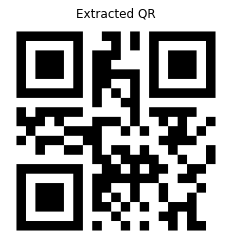

In [56]:
img_ext = cv2.imread("/Users/eiglesias/Desktop/vcsd_test/decryptor/qr_code_extracted.png")
print(type(img_ext))
#print(img_ext)
plt.imshow(img_ext)
plt.title("Extracted QR")
plt.axis('off')
plt.show()

In [51]:
detector = cv2.QRCodeDetector()
data, bbox, straight_qrcode = detector.detectAndDecode(img_ext)
print(f"Extracted message: {data}")

Extracted message: hola


<class 'qrcode.image.pil.PilImage'>
<class 'numpy.ndarray'>


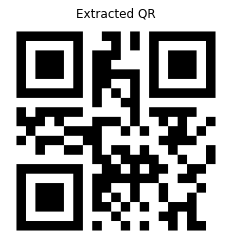

Extracted message: hola


In [58]:
print(type(im_extracted))
im_extracted = np.asarray(im_extracted.convert('RGB'))
print(type(im_extracted))
plt.imshow(im_extracted)
plt.title("Extracted QR")
plt.axis('off')
plt.show()

detector = cv2.QRCodeDetector()
data, bbox, straight_qrcode = detector.detectAndDecode(im_extracted)
print(f"Extracted message: {data}")

## Function

Dictinary of sizes and versions

In [21]:
# size: version dictionary
# keys   -> qr code sizes
# values -> qr code version number
qr_size_version_dict = {
    21:  1,  	 25:  2,  	 29:  3,  	 33:  4,  	 37:  5,  	
    41:  6,  	 45:  7,  	 49:  8,  	 53:  9,  	 57:  10,  	
    61:  11,  	 65:  12,  	 69:  13,  	 73:  14,  	 77:  15,  	
    81:  16,  	 85:  17,  	 89:  18,  	 93:  19,  	 97:  20,  	
    101: 21,  	 105: 22,  	 109: 23,  	 113: 24,  	 117: 25,  	
    121: 26,  	 125: 27,  	 129: 28,  	 133: 29,  	 137: 30,  	
    141: 31,  	 145: 32,  	 149: 33,  	 153: 34,  	 157: 35,  	
    161: 36,  	 165: 37,  	 169: 38,  	 173: 39,  	 177: 40
}

To be completed

Think about isolating the load and validation part (steps 1 to 3)

In [69]:
def load_im(path_im=""):
    """Load an image file 

    Load an image file (in .png format) and return it as a PIL Image object

    Parameters
    ----------
    path_im: str
        Absolute path where the image (in .png format) is stored

    Returns
    -------
    im: object
        Image object, instance of the PIL Image class
    """
    if(path_im!=""):
        try:
            im = Image.open(path_im, mode="r")
            print(emojis["check_mark_button"] + f" Image successfully loaded from {path_im}")
            return im
        except:
            print(emojis["cross_mark"] + f" Unable to correctly load the image from {path_im}")
    else:
        print(emojis["cross_mark"] + " The path to the image was not provided")

In [70]:
def load_and_validate_trans(path_im_A="", path_im_B=""):

    # load transparence images
    im_trans_A = load_im(path_im=path_im_A)
    im_trans_B = load_im(path_im=path_im_B) 
    
    # extract binary matrix
    trans_A = gen_transparence_from_image(im_trans_A)
    trans_B = gen_transparence_from_image(im_trans_B)
    
    # determine version of the hidden qr code
    if(len(trans_A) == len(trans_B)):
        print(emojis["check_mark_button"] + " Loaded transparences are equally sized")
        qr_size = round(len(trans_A)/2)
        detected_version = qr_size_version_dict[qr_size]
        print(emojis["magnifying_glass"] + f" Loaded transparences correspond to a QR code version {detected_version}")
    else:
        print(emojis["cross_mark"] + f" There is size mismatch between both transparencies: {trans_A.shape} and {trans_B.shape}. They need to be equally sized")
        
    return trans_A, trans_B

In [71]:
# obtain transparences and qr code version from the images provided
trans_A, trans_B = load_and_validate_trans(path_im_A="", path_im_B="")

❌ The path to the image was not provided
❌ The path to the image was not provided


IndexError: tuple index out of range

In [25]:
def extract_qr_from_transparences(trans_A, trans_B):
    
    # recover QR code matrix applying visual criptography   
    qr_rec_XOR = trans_A != trans_B
    submatrix_size = 2
    qr_matrix_rec = qr_rec_XOR[::submatrix_size, ::submatrix_size]

    return qr_matrix_rec

In [73]:
def extract_data_from_qr_matrix(qr_matrix_rec, save_im=False, path_im_QR_rec=""):
    
    # convert that matrix into qr_code object
    qr_version = qr_size_version_dict[len(qr_matrix_rec)]
    qr_code = qrcode.QRCode(version=qr_version, border=1)
    qr_code.make(fit=True)
    qr_code.modules = qr_matrix_rec
    
    # obtain image object with the qr code extracted
    im_qr_extracted = qr_code.make_image()
    if(save_im):
        save_image(im=im_qr_extracted, path_im=path_im_QR_rec)
    
    # use cv2 to extract the data from the qr image object
    im_qr_extracted = np.asarray(im_qr_extracted.convert('RGB'))
    detector = cv2.QRCodeDetector()
    data, bbox, straight_qrcode = detector.detectAndDecode(im_qr_extracted)
    
    return data